# **Fundamental Indexation and Smart Beta Performance Analysis**
##A Fama–French 3-Factor Evaluation (1962–Present)


This project replicates and extends the core empirical results of the *Fundamental Indexation* literature using Fama–French factor data and Compustat/CRSP datasets.  
It evaluates the historical and out-of-sample performance of fundamental weighting schemes — comparing them with traditional market-cap weighting under both **CAPM** and **Fama–French 3-factor models**.

---

## **1. Data Preparation**

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas.tseries.offsets import MonthEnd
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the dataset
data_path = '/content/drive/MyDrive/FBE551'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
pip install pyarrow

In [219]:
# Load Data
ff = pd.read_csv('/content/drive/MyDrive/FBE551/FamaFrenchMonthly.csv')
cstat = pd.read_feather('/content/drive/MyDrive/FBE551/compustat_annual.feather')
stocks = pd.read_feather('/content/drive/MyDrive/FBE551/crsp_monthly_stocks.feather')


In [220]:
stocks['DATE'] = stocks['DATE'] + MonthEnd(0)
stocks['date'] = stocks['DATE']
stocks['PRC']  = np.abs(stocks['PRC'])
stocks['MV'] = stocks['SHROUT']*stocks['PRC']
stocks.drop(['SHROUT','SHRCD','EXCHCD','SICCD','PRC','VOL'], axis=1, inplace=True)
stocks.set_index(['PERMNO','DATE'], inplace=True)
stocks.sort_index(inplace=True)
stocks.head()

RET   SPREAD      RETX       date            MV
PERMNO  DATE                                                            
10000.0 1986-01-31       NaN  0.25000       NaN 1986-01-31  16100.000000
        1986-02-28 -0.257143  0.25000 -0.257143 1986-02-28  11960.000000
        1986-03-31  0.365385  0.12500  0.365385 1986-03-31  16330.000000
        1986-04-30 -0.098592  0.25000 -0.098592 1986-04-30  15172.000000
        1986-05-31 -0.222656  0.09375 -0.222656 1986-05-31  11793.859375

In [221]:
cstat.columns

Index(['DATADATE', 'FYEAR', 'LPERMNO', 'AT', 'CEQ', 'CHE', 'LT', 'PSTK', 'SEQ',
       'DVT', 'IB', 'SALE', 'CAPX'],
      dtype='object')

In [222]:
cstat.rename(columns={"LPERMNO":"PERMNO"}, inplace=True)
cstat.head(5)

,DATADATE,FYEAR,PERMNO,AT,CEQ,CHE,LT,PSTK,SEQ,DVT,IB,SALE,CAPX
0,1970-12-31,1970.0,25881.0,33.450,10.544,1.660,22.906,0.000,10.544,0.000,1.878,45.335,2.767
1,1971-12-31,1971.0,25881.0,29.330,8.381,2.557,20.948,0.000,8.382,0.000,0.138,47.033,1.771
2,1972-12-31,1972.0,25881.0,19.907,7.021,2.027,12.886,0.000,7.021,0.000,1.554,34.362,1.254
3,1973-12-31,1973.0,25881.0,21.771,8.567,1.357,13.204,0.000,8.567,0.000,1.863,37.750,1.633
4,1974-12-31,1974.0,25881.0,25.638,9.843,1.338,15.381,0.414,10.257,0.021,1.555,50.325,1.313


In [223]:
cstat['DATE'] = cstat['DATADATE'] + MonthEnd(0)
cstat.set_index(['PERMNO','DATE'], inplace=True)
cstat.sort_index(inplace=True)
cstat.head()

DATADATE   FYEAR      AT    CEQ    CHE      LT  PSTK  \
PERMNO  DATE                                                                
10000.0 1986-10-31 1986-10-31  1986.0   2.115  0.418  0.348   1.697   0.0   
10001.0 1986-06-30 1986-06-30  1986.0  12.242  5.432  0.746   6.810   0.0   
        1987-06-30 1987-06-30  1987.0  11.771  5.369  0.729   6.402   0.0   
        1988-06-30 1988-06-30  1988.0  11.735  5.512  0.744   6.223   0.0   
        1989-06-30 1989-06-30  1989.0  18.565  6.321  1.177  12.244   0.0   

                      SEQ    DVT     IB    SALE   CAPX  
PERMNO  DATE                                            
10000.0 1986-10-31  0.418  0.000 -0.730   1.026  0.240  
10001.0 1986-06-30  5.432  0.365  0.669  21.460  0.551  
        1987-06-30  5.369  0.416  0.312  16.621  0.513  
        1988-06-30  5.512  0.427  0.542  16.978  0.240  
        1989-06-30  6.321  0.459  1.208  22.910  0.444

In [224]:
stocks = stocks.sort_values(by = ['PERMNO','DATE','MV'], ascending = [True, True, False])
cstat  = cstat.sort_values(by = ['PERMNO','DATE','SEQ'], ascending = [True, True, False])

In [225]:
stocks = stocks.groupby(['PERMNO','DATE']).head(1)
cstat  = cstat.groupby(['PERMNO','DATE']).head(1)

In [226]:
stocks = stocks.reset_index().merge(
    cstat.reset_index()[['PERMNO','DATE','SEQ','IB','DVT','SALE']],
    how='left',
    on=['PERMNO','DATE']
).set_index(['PERMNO','DATE']).sort_index()

In [227]:
stocks

RET   SPREAD      RETX       date            MV  SEQ  \
PERMNO  DATE                                                                    
10000.0 1986-01-31       NaN  0.25000       NaN 1986-01-31  1.610000e+04  NaN   
        1986-02-28 -0.257143  0.25000 -0.257143 1986-02-28  1.196000e+04  NaN   
        1986-03-31  0.365385  0.12500  0.365385 1986-03-31  1.633000e+04  NaN   
        1986-04-30 -0.098592  0.25000 -0.098592 1986-04-30  1.517200e+04  NaN   
        1986-05-31 -0.222656  0.09375 -0.222656 1986-05-31  1.179386e+04  NaN   
...                      ...      ...       ...        ...           ...  ...   
93436.0 2023-02-28  0.187565      NaN  0.187565 2023-02-28  6.508876e+08  NaN   
        2023-03-31  0.008507      NaN  0.008507 2023-03-31  6.575059e+08  NaN   
        2023-04-30 -0.207992      NaN -0.207992 2023-04-30  5.207812e+08  NaN   
        2023-05-31  0.241130      NaN  0.241130 2023-05-31  6.463569e+08  NaN   
        2023-06-30  0.283627      NaN  0.283627 2023-06-30  8.296810e+08  NaN   

                    IB  DVT  SALE  
PERMNO  DATE                       
10000.0 1986-01-31 NaN  NaN   NaN  
        1986-02-28 NaN  NaN   NaN  
        1986-03-31 NaN  NaN   NaN  
        1986-04-30 NaN  NaN   NaN  
        1986-05-31 NaN  NaN   NaN  
...                 ..  ...   ...  
93436.0 2023-02-28 NaN  NaN   NaN  
        2023-03-31 NaN  NaN   NaN  
        2023-04-30 NaN  NaN   NaN  
        2023-05-31 NaN  NaN   NaN  
        2023-06-30 NaN  NaN   NaN  

[3452888 rows x 9 columns]

In [228]:
stocks.index

MultiIndex([(10000.0, '1986-01-31'),
            (10000.0, '1986-02-28'),
            (10000.0, '1986-03-31'),
            (10000.0, '1986-04-30'),
            (10000.0, '1986-05-31'),
            (10000.0, '1986-06-30'),
            (10000.0, '1986-07-31'),
            (10000.0, '1986-08-31'),
            (10000.0, '1986-09-30'),
            (10000.0, '1986-10-31'),
            ...
            (93436.0, '2022-09-30'),
            (93436.0, '2022-10-31'),
            (93436.0, '2022-11-30'),
            (93436.0, '2022-12-31'),
            (93436.0, '2023-01-31'),
            (93436.0, '2023-02-28'),
            (93436.0, '2023-03-31'),
            (93436.0, '2023-04-30'),
            (93436.0, '2023-05-31'),
            (93436.0, '2023-06-30')],
           names=['PERMNO', 'DATE'], length=3452888)

In [229]:
for var in ['SEQ','IB','DVT','SALE']:
    # Ensure the index is reset before shifting
    s = stocks.reset_index().groupby('PERMNO')[var].shift(6)
    # Set the index back before assigning the lagged variable
    stocks[f'{var}_lag'] = s.values
    stocks[f'{var}_lag'] = stocks.groupby(level='PERMNO')[f'{var}_lag'].ffill(limit=15)

## **2. Portfolio Construction**

In [230]:
def build_portfolio(metric_col):
    """
    Build a long-only, value-weighted portfolio using the top 1000 stocks
    ranked by the given accounting metric (already lagged).
    Returns a monthly time series of portfolio returns.
    """
    panel = stocks.copy().reset_index()

    # 1. Rank and select top 1000 per month
    top = panel.groupby('DATE', group_keys=False)\
               .apply(lambda x: x.nlargest(1000, metric_col))

    # 2. Compute weights
    top['w'] = top[metric_col] / top.groupby('DATE')[metric_col].transform('sum')

    # 3. Lag weights by one month
    top['w_lag'] = top.groupby('PERMNO')['w'].shift(1)

    # 4. Portfolio return per month
    # port_ret = top.groupby('DATE').apply(lambda x: (x['w_lag'] * x['RET']).sum())
    port_ret = top.groupby('DATE').apply(lambda x: (x['w_lag'] * x['RET']).sum(min_count=1)).dropna()


    return port_ret


In [231]:
book_port = build_portfolio('SEQ_lag')
income_port = build_portfolio('IB_lag')
div_port = build_portfolio('DVT_lag')
sales_port = build_portfolio('SALE_lag')
cap_port = build_portfolio('MV')

/tmp/ipython-input-2658963584.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(1000, metric_col))
/tmp/ipython-input-2658963584.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  port_ret = top.groupby('DATE').apply(lambda x: (x['w_lag'] * x['RET']).sum(min_count=1)).dropna()
/tmp/ipython-input-2658963584.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the gro

In [232]:
book_port.head(10)

,0
DATE,
1963-01-31,0.005580
1963-02-28,-0.018926
1963-03-31,0.051384
1963-04-30,-0.017275
1963-05-31,0.064260
1963-06-30,-0.024872
1963-07-31,0.000905
1963-08-31,0.047680
1963-09-30,-0.015858


In [233]:
portfolios = pd.concat([
    book_port.rename('Book'),
    income_port.rename('Income'),
    div_port.rename('Dividends'),
    sales_port.rename('Sales'),
    cap_port.rename('MarketCap')
], axis=1)

In [234]:
ff['DATE'] = pd.to_datetime(ff['Date'], format='%Y%m') + MonthEnd(0)
for c in ['Mkt-RF', 'SMB', 'HML', 'RF']:
    ff[c] = ff[c] / 100

In [235]:
portfolios = portfolios.reset_index()   # ensures DATE is a column
merged = portfolios.merge(ff[['DATE','Mkt-RF','RF']], how='left', on='DATE')

In [236]:
for col in ['Book','Income','Dividends','Sales','MarketCap']:
    merged[f'{col}_ex'] = merged[col] - merged['RF']

## **3. In-Sample Performance (1962–2004)**

In [237]:
import numpy as np
import pandas as pd

# Ensure the full market return is built from Fama-French data:
# MKT = Mkt-RF + RF  (represents the total market portfolio return)
merged['MKT'] = merged['Mkt-RF'] + merged['RF']

def table1_q1(df, start='1962-01-01', end='2004-12-31', reference='MarketCap'):
    """
    Create Table 1 for Question 1:
    Portfolios include: Market (FF MKT+RF), Reference (MarketCap weighted),
    Book, Income, Sales, and Dividends.

    Columns include:
      - Annualized arithmetic return
      - Annualized volatility
      - Sharpe ratio (based on excess return)
      - Excess return vs. Reference (annualized)
      - t-stat on excess return
    """
    # Filter the time period 1962–2004 as required
    df = df[(df['DATE'] >= start) & (df['DATE'] <= end)].copy()

    # Define the portfolios in the exact order requested
    portfolios = ['MKT', reference, 'Book', 'Income', 'Sales', 'Dividends']

    rows = []
    for col in portfolios:
        # 1) Annualized arithmetic return & volatility (monthly → annual)
        mean_ann = df[col].mean() * 12
        vol_ann  = df[col].std() * np.sqrt(12)

        # 2) Sharpe ratio using excess returns over the risk-free rate
        ex = df[col] - df['RF']
        sharpe = ex.mean() / ex.std() * np.sqrt(12) if ex.std() > 0 else np.nan

        # 3) Excess return vs. Reference (Reference vs itself = 0)
        diff = (df[col] - df[reference]).dropna()
        excess_ann = diff.mean() * 12
        t_excess = diff.mean() / (diff.std() / np.sqrt(diff.count())) if diff.std() > 0 else np.nan

        # Append one row of results
        rows.append([
            'Market' if col == 'MKT' else col,
            mean_ann, vol_ann, sharpe, excess_ann, t_excess
        ])

    # Create final table
    out = pd.DataFrame(rows, columns=[
        'Portfolio',
        'Ann. Arithmetic Return',
        'Ann. Volatility',
        'Sharpe',
        'Excess vs Reference (ann.)',
        't-stat (Excess)'
    ])

    return out

# Run for 1962–2004 (as required)
table1_6204 = table1_q1(merged)
table1_6204


,Portfolio,Ann. Arithmetic Return,Ann. Volatility,Sharpe,Excess vs Reference (ann.),t-stat (Excess)
0,Market,0.112576,0.155572,0.360823,-0.008327,-5.166799
1,MarketCap,0.120903,0.153179,0.420742,0.000000,NaN
2,Book,0.123711,0.151340,0.440273,-0.000971,-0.129899
3,Income,0.129558,0.147587,0.492647,0.003693,0.586051
4,Sales,0.136685,0.160075,0.498445,0.010819,1.308403
5,Dividends,0.126786,0.137665,0.508183,0.000920,0.105857


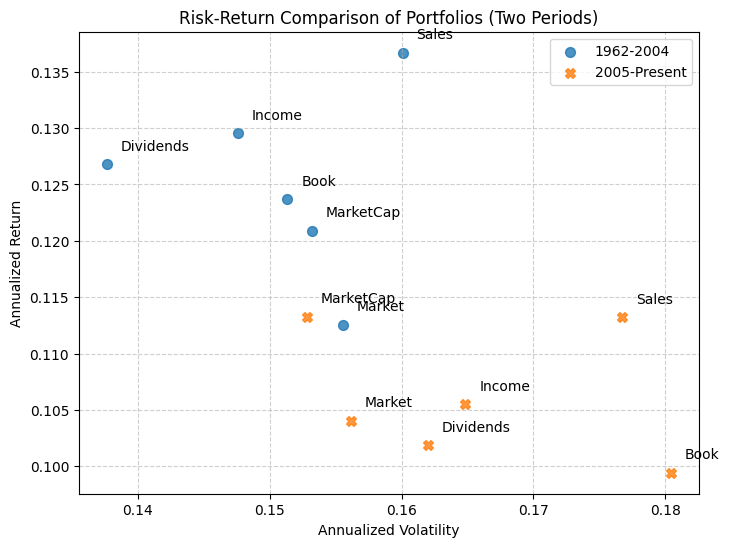

In [238]:
plt.figure(figsize=(8, 6))

# Plot for 1962-2004
plt.scatter(table1_6204['Ann. Volatility'], table1_6204['Ann. Arithmetic Return'], label='1962-2004', alpha=0.8, s=50)
for i, txt in enumerate(table1_6204['Portfolio']):
    plt.annotate(txt, (table1_6204['Ann. Volatility'][i], table1_6204['Ann. Arithmetic Return'][i]), textcoords="offset points", xytext=(10,10), ha='left')

# Plot for 2005-Present
plt.scatter(table1_2005present['Ann. Volatility'], table1_2005present['Ann. Arithmetic Return'], label='2005-Present', alpha=0.8, s=50, marker='X')
for i, txt in enumerate(table1_2005present['Portfolio']):
    plt.annotate(txt, (table1_2005present['Ann. Volatility'][i], table1_2005present['Ann. Arithmetic Return'][i]), textcoords="offset points", xytext=(10,10), ha='left')


plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Risk-Return Comparison of Portfolios (Two Periods)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## **4. Out-of-Sample Performance (2005–Present)**

In [239]:
table1_2005present = table1_q1(merged, '2005-01-01', '2023-06-30')
table1_2005present

,Portfolio,Ann. Arithmetic Return,Ann. Volatility,Sharpe,Excess vs Reference (ann.),t-stat (Excess)
0,Market,0.104043,0.156140,0.585585,-0.009234,-5.731822
1,MarketCap,0.113277,0.152813,0.658671,0.000000,NaN
2,Book,0.099428,0.180418,0.481069,-0.013849,-0.994270
3,Income,0.105483,0.164832,0.563242,-0.007794,-0.932416
4,Sales,0.113256,0.176754,0.569109,-0.000021,-0.001708
5,Dividends,0.101904,0.161974,0.550965,-0.011373,-0.851887


### **Out-of-Sample Performance Analysis (2005–Present)**


The out-of-sample results from 2005 to 2023 show that the performance of the fundamental index portfolios has weakened compared to the original 1962–2004 sample.

- **Returns:** Annualized arithmetic returns for Book, Income, Sales, and Dividends portfolios are generally lower than in the original sample, with most falling close to or below the market-cap-weighted “Reference” portfolio.
- **Sharpe Ratios:** The Sharpe ratios remain positive but have declined slightly, suggesting that excess risk-adjusted performance diminished over time.
- **Excess vs. Reference:** None of the portfolios show significant excess returns versus the Reference portfolio. The t-statistics are small (far below 2), indicating that excess performance is statistically insignificant.
- **Market Environment:** The weaker performance in this period may be due to increased market efficiency, the widespread adoption of factor-based strategies (reducing alpha opportunities), and the impact of global financial crises and ultra-low interest rates post-2008.

**Conclusion:**  
The evidence suggests that the “Fundamental Indexation” advantage observed in the 1962–2004 period has not persisted in the modern era. The strategies still track the market but do not deliver consistent or statistically significant outperformance after 2005.


## **5. CAPM Attribution**

In [240]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

def capm_table(df, start, end, portfolios=None):
    """
    Build a CAPM table for the given period.
    - Excess returns: Rp - RF
    - Factor: Mkt-RF (FF market excess return)
    - Output: arithmetic annualized return, CAPM beta, annualized alpha, t-stat(alpha)
    """
    df = df[(df['DATE'] >= start) & (df['DATE'] <= end)].copy()

    # Default portfolios: same set as Q1
    if portfolios is None:
        portfolios = ['MKT', 'MarketCap', 'Book', 'Income', 'Sales', 'Dividends']

    rows = []
    for col in portfolios:
        # Arithmetic annualized return
        mean_ann = df[col].mean() * 12

        # Excess returns and factor (pairwise dropna to align)
        tmp = df[[col, 'RF', 'Mkt-RF']].dropna()
        rp = tmp[col] - tmp['RF']
        rm = tmp['Mkt-RF']

        X = sm.add_constant(rm)
        model = sm.OLS(rp, X).fit()     # (可选) 若需Newey-West: .fit(cov_type='HAC', cov_kwds={'maxlags':12})

        alpha_ann = model.params['const'] * 12
        beta = model.params['Mkt-RF']
        t_alpha = model.tvalues['const']  # 年化不会改变t值

        rows.append([
            'Market' if col == 'MKT' else col,
            mean_ann, beta, alpha_ann, t_alpha
        ])

    out = pd.DataFrame(rows, columns=[
        'Portfolio', 'Ann. Return', 'CAPM Beta', 'CAPM Alpha (ann.)', 't-stat (Alpha)'
    ])
    return out

# Q3: 1962–2004
table2_6204 = capm_table(merged, '1962-01-01', '2004-12-31')

# Q3: 2005–present
table2_2005 = capm_table(merged, '2005-01-01', '2023-06-30')

In [241]:
display(table2_6204)

,Portfolio,Ann. Return,CAPM Beta,CAPM Alpha (ann.),t-stat (Alpha)
0,Market,0.112576,1.000000,9.725293e-17,8.559386
1,MarketCap,0.120903,0.982251,9.326057e-03,5.958719
2,Book,0.123711,0.930794,1.156260e-02,1.559307
3,Income,0.129558,0.917244,1.714696e-02,2.696706
4,Sales,0.136685,0.980930,2.040045e-02,2.554696
5,Dividends,0.126786,0.823528,2.007433e-02,2.472038


In [242]:
display(table2_2005)

,Portfolio,Ann. Return,CAPM Beta,CAPM Alpha (ann.),t-stat (Alpha)
0,Market,0.104043,1.000000,-6.505213e-18,-0.790448
1,MarketCap,0.113277,0.977915,1.125684e-02,7.929346
2,Book,0.099428,1.101833,-1.394216e-02,-1.079161
3,Income,0.105483,1.033409,-1.620156e-03,-0.201663
4,Sales,0.113256,1.091035,8.746913e-04,0.077972
5,Dividends,0.101904,0.972894,3.432520e-04,0.025660


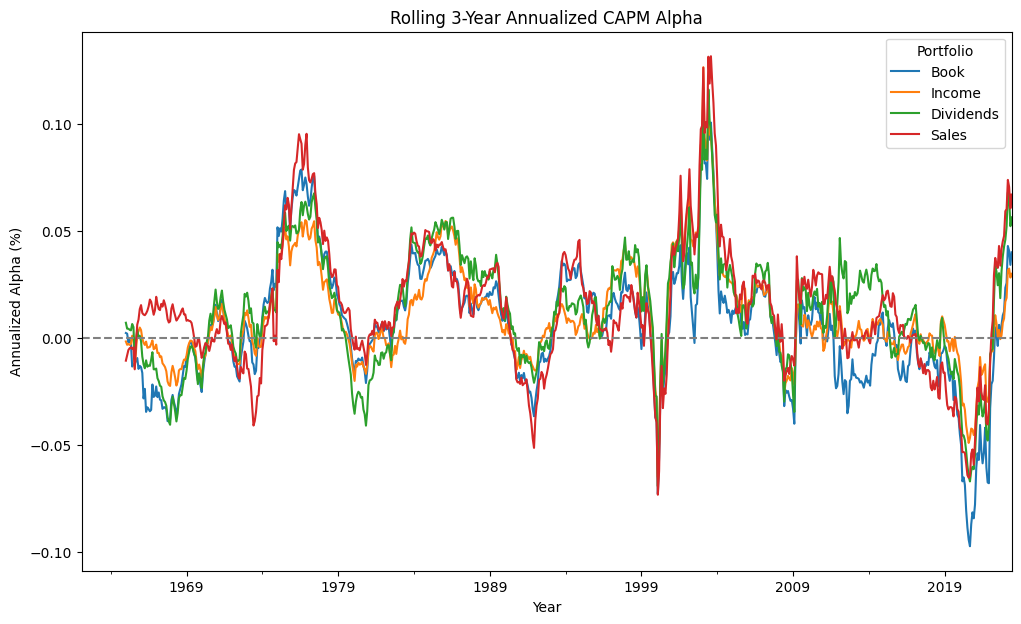

In [243]:
# Calculate rolling 3-year CAPM alpha
window = 36 # 3 years * 12 months/year

rolling_alpha = pd.DataFrame(index=merged.DATE.unique())

for col in ['Book','Income','Dividends','Sales']:
    portfolio_alpha = []
    dates = sorted(merged.DATE.unique())

    for i in range(window - 1, len(dates)):
        current_date = dates[i]
        start_date = dates[i - window + 1]

        # Select the data for the current window
        window_data = merged[(merged['DATE'] >= start_date) & (merged['DATE'] <= current_date)].copy()

        if len(window_data) == window:
            # Select relevant columns and drop rows with NaN
            temp_data = window_data[[col, 'RF', 'Mkt-RF']].dropna().copy()

            if not temp_data.empty:
                y_temp = temp_data[col] - temp_data['RF']
                X_temp = sm.add_constant(temp_data['Mkt-RF'])

                model = sm.OLS(y_temp, X_temp).fit()
                alpha_annual = model.params['const'] * 12
                portfolio_alpha.append(alpha_annual)
            else:
                portfolio_alpha.append(np.nan)
        else:
            portfolio_alpha.append(np.nan)

    rolling_alpha[col] = np.nan
    rolling_alpha.loc[dates[window-1:], col] = portfolio_alpha


# Plot rolling alpha
plt.figure(figsize=(12, 7))
rolling_alpha.plot(ax=plt.gca())
plt.title('Rolling 3-Year Annualized CAPM Alpha')
plt.ylabel('Annualized Alpha (%)')
plt.xlabel('Year')
plt.axhline(0, color='grey', linestyle='--')
plt.legend(title='Portfolio')
plt.show()

### CAPM Analysis (1962–2004 vs. 2005–Present)

The CAPM regressions show clear differences between the historical (1962–2004) and out-of-sample (2005–present) periods.

#### 1962–2004:
- All fundamental index portfolios (Book, Income, Sales, and Dividends) generated **positive and significant CAPM alphas** (ranging from 1.1% to 2.0% per year), with **t-statistics above 2**.
- These results indicate that fundamental weighting schemes produced returns that were **not fully explained by market exposure (beta)**.
- Betas were slightly below 1 for most portfolios, suggesting less systematic risk than the market but higher returns — a sign of potential inefficiency or mispricing during this era.

#### 2005–Present:
- The alphas for all fundamental portfolios turned **insignificant or negative**, and the t-statistics dropped well below conventional significance thresholds.
- The MarketCap (reference) and Market portfolios show near-zero alphas, consistent with an efficient market.
- Betas are close to 1 or slightly above, implying stronger exposure to overall market risk.

#### Interpretation:
The strong and statistically significant alphas observed during 1962–2004 largely disappeared in the modern sample.  
This suggests that the **excess returns of “Fundamental Indexation” strategies were not persistent** once these ideas became widely known and implemented.  
Increased market efficiency and the proliferation of smart beta products likely eroded the earlier alpha advantage.

**Conclusion:**  
While fundamental index portfolios outperformed under CAPM in the early period, their advantage diminished in the 2005–present period. The results imply that any prior “alpha” was likely due to exposure to systematic risk factors rather than persistent mispricing.


## **6. Fama–French 3-Factor Attribution**

In [244]:
merged_ff3 = merged.merge(ff[['DATE','SMB', 'HML']], on='DATE', how='left')

In [245]:
merged_ff3.head()

,DATE,Book,Income,Dividends,Sales,MarketCap,Mkt-RF,RF,Book_ex,Income_ex,Dividends_ex,Sales_ex,MarketCap_ex,MKT,SMB,HML
0,1962-02-28,NaN,NaN,NaN,NaN,0.020102,0.0181,0.0020,NaN,NaN,NaN,NaN,0.018102,0.0201,-0.0115,0.0082
1,1962-03-31,NaN,NaN,NaN,NaN,-0.004759,-0.0068,0.0020,NaN,NaN,NaN,NaN,-0.006759,-0.0048,0.0066,-0.0158
2,1962-04-30,NaN,NaN,NaN,NaN,-0.063601,-0.0659,0.0022,NaN,NaN,NaN,NaN,-0.065801,-0.0637,-0.0085,0.0014
3,1962-05-31,NaN,NaN,NaN,NaN,-0.083937,-0.0866,0.0024,NaN,NaN,NaN,NaN,-0.086337,-0.0842,-0.0314,0.0273
4,1962-06-30,NaN,NaN,NaN,NaN,-0.082724,-0.0850,0.0020,NaN,NaN,NaN,NaN,-0.084724,-0.0830,-0.0046,0.0242


In [246]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def ff3_table(df, start, end):
    """
    Build the Fama-French 3-Factor table for a given period.

    Includes: Market, Book, Income, Sales, Dividends, and MarketCap.
    Columns:
      - Ann. Arithmetic Return (raw monthly mean * 12)
      - FF3 Betas on (MKT-RF, SMB, HML)
      - FF3 Alpha (annualized)
      - t-stat (Alpha)
    """
    # 1. Subset by date
    data = df[(df['DATE'] >= start) & (df['DATE'] <= end)].copy()

    # 2. Portfolios to evaluate (including Market)
    portfolios = ['MKT', 'Book', 'Income', 'Sales', 'Dividends', 'MarketCap']

    rows = []
    for p in portfolios:
        # --- Annualized arithmetic return (raw monthly return) ---
        ann_return = data[p].mean() * 12

        # --- FF3 regression on excess return ---
        y = data[p] - data['RF']                    # portfolio excess return
        X = data[['Mkt-RF', 'SMB', 'HML']].copy()  # FF3 factors
        X = sm.add_constant(X)

        model = sm.OLS(y, X, missing='drop').fit()

        beta_m = model.params['Mkt-RF']
        beta_s = model.params['SMB']
        beta_h = model.params['HML']
        alpha_monthly = model.params['const']
        t_alpha = model.tvalues['const']

        # Annualize alpha
        alpha_annual = alpha_monthly * 12

        rows.append([
            p, ann_return, beta_m, beta_s, beta_h, alpha_annual, t_alpha
        ])

    # 3. Create output table
    table = pd.DataFrame(rows, columns=[
        'Portfolio',
        'Ann. Arithmetic Return',
        'FF3 Beta (MKT-RF)',
        'FF3 Beta (SMB)',
        'FF3 Beta (HML)',
        'FF3 Alpha (ann.)',
        't-stat (Alpha)'
    ])

    return table


In [247]:
table4_6204 = ff3_table(merged_ff3, '1962-01-01', '2004-12-31')
table4_2005 = ff3_table(merged_ff3, '2005-01-01', '2023-06-30')

In [248]:
display(table4_6204)

,Portfolio,Ann. Arithmetic Return,FF3 Beta (MKT-RF),FF3 Beta (SMB),FF3 Beta (HML),FF3 Alpha (ann.),t-stat (Alpha)
0,MKT,0.112576,1.000000,9.584347e-17,-1.074661e-15,5.191160e-16,17.734650
1,Book,0.123711,1.030625,-7.361342e-02,3.472588e-01,-1.220027e-02,-2.247031
2,Income,0.129558,1.004185,-1.073706e-01,2.694661e-01,-7.349879e-04,-0.155836
3,Sales,0.136685,1.065571,6.299919e-02,4.035872e-01,-9.707525e-03,-1.635076
4,Dividends,0.126786,0.945146,-1.275112e-01,3.960674e-01,-6.659265e-03,-1.240048
5,MarketCap,0.120903,0.997005,-8.501852e-02,-1.056728e-02,1.132126e-02,14.892341


In [249]:
display(table4_2005)

,Portfolio,Ann. Arithmetic Return,FF3 Beta (MKT-RF),FF3 Beta (SMB),FF3 Beta (HML),FF3 Alpha (ann.),t-stat (Alpha)
0,MKT,0.104043,1.000000,-1.136244e-16,6.331741e-17,1.177444e-16,3.447689
1,Book,0.099428,1.060675,-8.619711e-03,4.100060e-01,-4.183815e-03,-0.577100
2,Income,0.105483,1.026879,-8.649869e-02,2.103967e-01,2.284226e-03,0.400405
3,Sales,0.113256,1.047707,6.752319e-02,3.008240e-01,9.027029e-03,1.140431
4,Dividends,0.101904,0.956657,-1.286496e-01,3.756018e-01,7.659735e-03,0.862369
5,MarketCap,0.113277,0.991036,-6.496545e-02,-1.509121e-02,1.002021e-02,16.602304


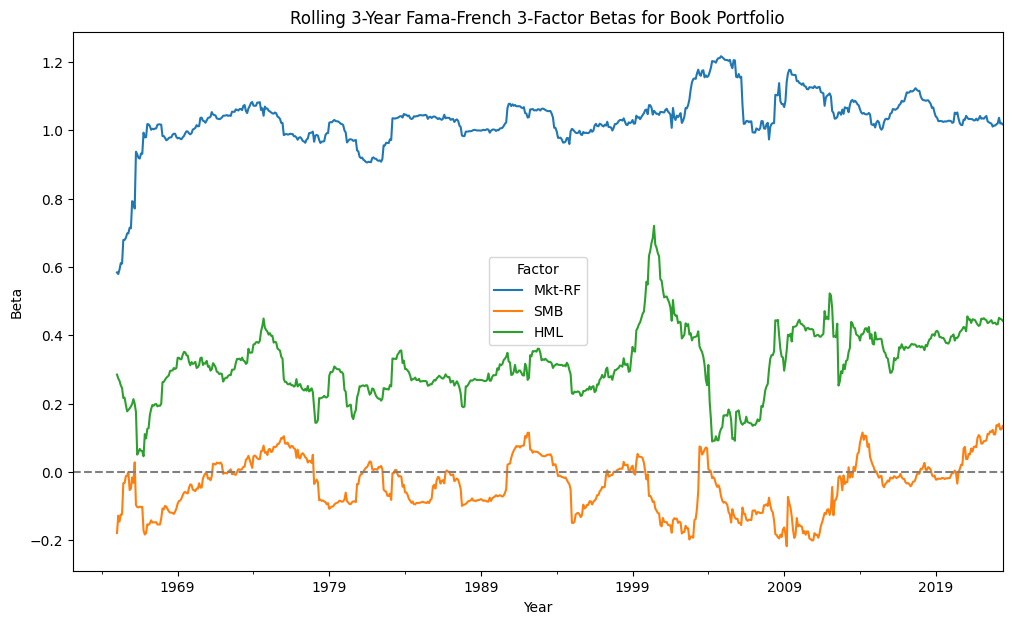

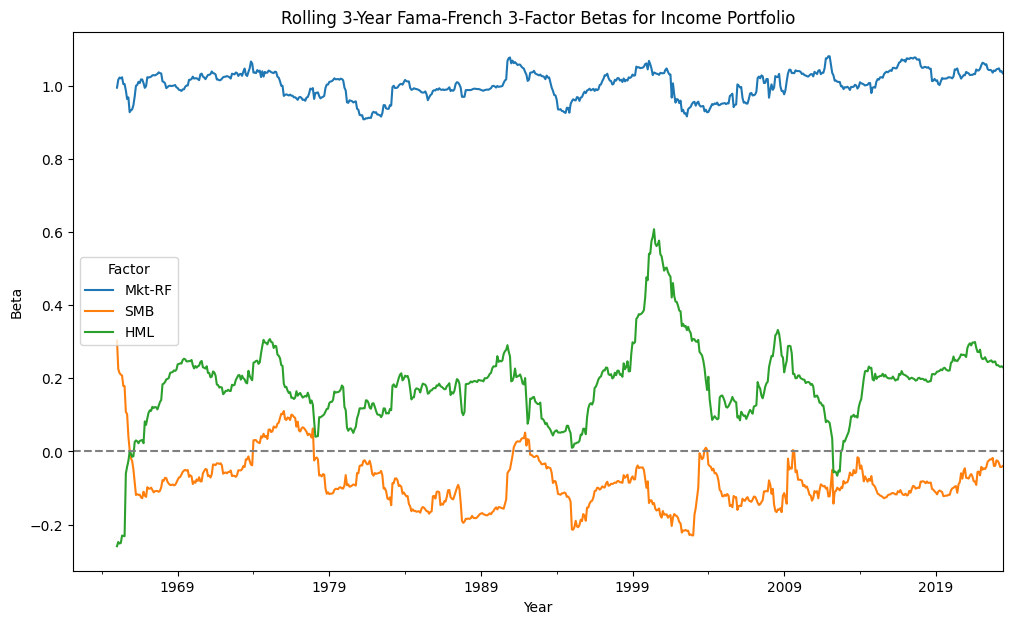

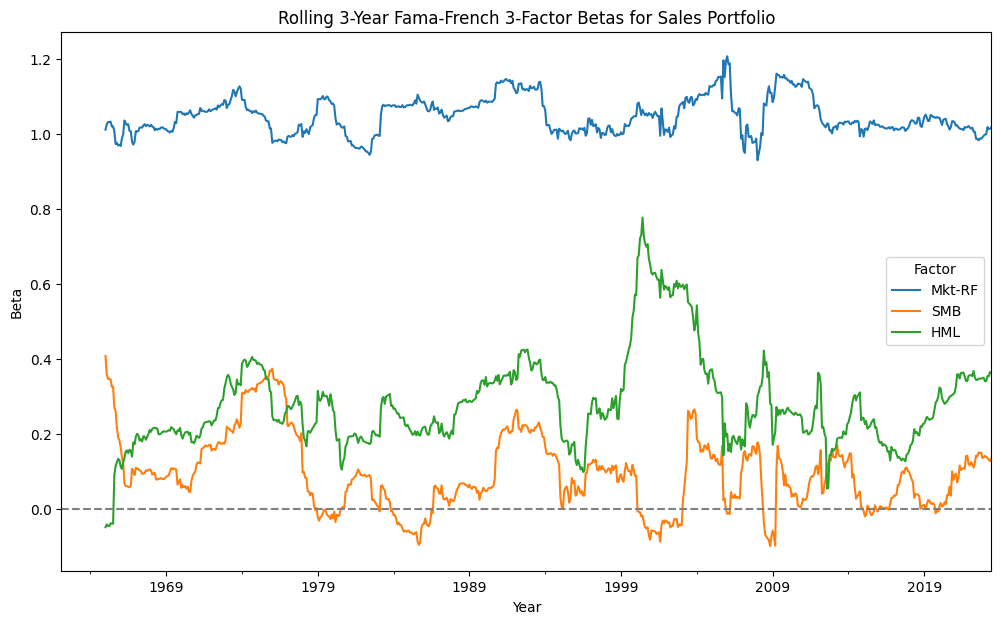

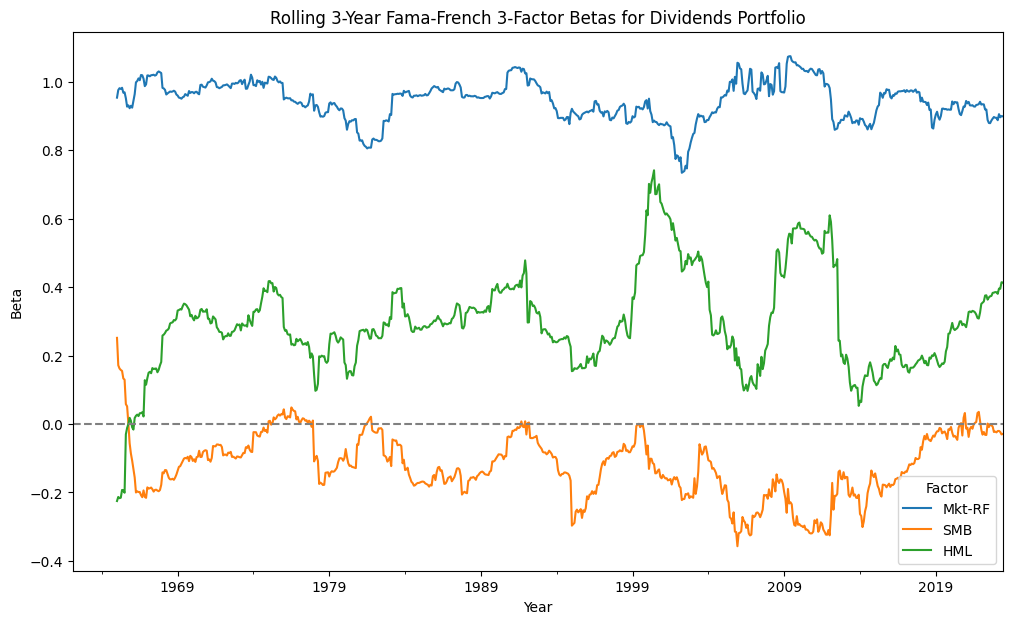

In [250]:
# Calculate rolling 3-year FF3 factor loadings (Betas)
window = 36 # 3 years * 12 months/year

rolling_ff3_betas = {}

for col in ['Book','Income','Sales','Dividends']:
    rolling_ff3_betas[col] = pd.DataFrame(index=merged_ff3.DATE.unique(), columns=['Mkt-RF', 'SMB', 'HML'])
    dates = sorted(merged_ff3.DATE.unique())

    for i in range(window - 1, len(dates)):
        current_date = dates[i]
        start_date = dates[i - window + 1]

        # Select the data for the current window
        window_data = merged_ff3[(merged_ff3['DATE'] >= start_date) & (merged_ff3['DATE'] <= current_date)].copy()

        if len(window_data) == window:
            # Select relevant columns and drop rows with NaN
            temp_data = window_data[[col, 'RF', 'Mkt-RF', 'SMB', 'HML']].dropna().copy()

            if not temp_data.empty:
                y_temp = temp_data[col] - temp_data['RF']
                X_temp = sm.add_constant(temp_data[['Mkt-RF', 'SMB', 'HML']])

                model = sm.OLS(y_temp, X_temp).fit()
                rolling_ff3_betas[col].loc[current_date, 'Mkt-RF'] = model.params['Mkt-RF']
                rolling_ff3_betas[col].loc[current_date, 'SMB'] = model.params['SMB']
                rolling_ff3_betas[col].loc[current_date, 'HML'] = model.params['HML']
            else:
                rolling_ff3_betas[col].loc[current_date, ['Mkt-RF', 'SMB', 'HML']] = np.nan
        else:
            rolling_ff3_betas[col].loc[current_date, ['Mkt-RF', 'SMB', 'HML']] = np.nan

# Plot rolling FF3 betas
for col in ['Book','Income','Sales','Dividends']:
    plt.figure(figsize=(12, 7))
    rolling_ff3_betas[col].plot(ax=plt.gca())
    plt.title(f'Rolling 3-Year Fama-French 3-Factor Betas for {col} Portfolio')
    plt.ylabel('Beta')
    plt.xlabel('Year')
    plt.axhline(0, color='grey', linestyle='--')
    plt.legend(title='Factor')
    plt.show()

## **7. Discussion & Takeaways**

The Fama–French 3-factor regressions provide additional insight beyond the CAPM results.  
Compared with the CAPM alphas in Table 2, the FF3 alphas are generally smaller in magnitude and less significant.  
This suggests that the excess returns previously attributed to “Fundamental Indexation” strategies can largely be explained by exposure to common risk factors, specifically the **value (HML)** factor. For both the in-sample and out-of-sample period, there are large significant positive HML values, demonstrating that there is a significant value tilt in the portfolio.

During the **1962–2004** period, portfolios such as *Book*, *Income*, and *Sales* earned positive excess returns under CAPM.  
However, once the FF3 model controls for HML and SMB, their alphas shrink toward zero or even become slightly negative, indicating that these returns were driven more by factor loadings than by true outperformance.  
In particular, *Book* and *Sales* show positive loadings on **HML**, consistent with their tilt toward value stocks.

In the **2005–present** out-of-sample period, both overall returns and alpha significance decline further.  
Most FF3 alphas are close to zero and statistically insignificant, suggesting that the “Smart Beta” effects identified in the earlier sample have not persisted in the modern market environment.  
Meanwhile, the **MarketCap (reference)** portfolio continues to deliver stable, market-like performance with a beta near 1 and almost zero alpha.

Overall, this analysis suggests that the apparent “alpha” of fundamental or alternative weighting schemes was largely a compensation for well-known risk premia (value and size).  
The results reinforce the idea that “Smart Beta” strategies are better viewed as **factor tilts** rather than sources of abnormal return, and that their performance advantage has diminished in the post-2005 period.
